In [ ]:
#Loading Data
#Inspecting Data
#Cleaning Data
#Merging & Time Aligning Data
#Saving the cleaned dataset

In [ ]:
import pandas as pd #working with data tables
import numpy as np #fast numerical calculations
import matplotlib.pyplot as plt#plotting, visialise trends/patterns
plt.style.use("ggplot")

In [3]:
#filepath to locate file. Go to folder -> find file -> load it here
#load raw 2022 demand data
demand_2022 = pd.read_csv("../data/raw/demand_2022_raw.csv")

In [4]:
demand_2022.head() #panda dataframe that shows first few rows of your data set

,SETTLEMENT_DATE,SETTLEMENT_PERIOD,ND,TSD,ENGLAND_WALES_DEMAND,EMBEDDED_WIND_GENERATION,EMBEDDED_WIND_CAPACITY,EMBEDDED_SOLAR_GENERATION,EMBEDDED_SOLAR_CAPACITY,NON_BM_STOR,...,IFA_FLOW,IFA2_FLOW,BRITNED_FLOW,MOYLE_FLOW,EAST_WEST_FLOW,NEMO_FLOW,NSL_FLOW,ELECLINK_FLOW,VIKING_FLOW,GREENLINK_FLOW
0,01-JAN-2022,1,21940,23275,20513,2713,6527,0,14008,0,...,-181,-4,586,320,384,-100,210,0,0,0
1,01-JAN-2022,2,22427,23489,21021,2755,6527,0,14008,0,...,-181,-4,583,320,403,-104,176,0,0,0
2,01-JAN-2022,3,21896,23672,20619,2930,6527,0,14008,0,...,-164,-4,567,320,440,-4,-205,0,0,0
3,01-JAN-2022,4,20693,23272,19615,3090,6527,0,14008,0,...,-170,-4,444,320,387,-6,-283,0,0,0
4,01-JAN-2022,5,19481,23958,18545,3161,6527,0,14008,0,...,-753,-4,-383,320,476,-561,-686,0,0,0


In [9]:
demand_2022["SETTLEMENT_PERIOD"].max() #spring + autumn clock changes

#learn to deal with -
#daylight savings
#inconsistent time lengths
#time alignment
#duplicate hours
#extra settlement periods

50

In [18]:
#build a proper timestamp column
#to merge demand & temp, and carry out model

# First convert the SETTLEMENT_DATE column to a real date
demand_2022["SETTLEMENT_DATE"] = pd.to_datetime(demand_2022["SETTLEMENT_DATE"])

# Convert settlement period to number of minutes past midnight
# SP1 = 00:00, SP2 = 00:30, SP3 = 01:00 ...((3-1)x30 = 60)
demand_2022["minutes"] = (demand_2022["SETTLEMENT_PERIOD"] - 1) * 30

# Add the minutes to the date to get a full timestamp - pd.to_timedelta() tells pandas take these numbers and treat them as amounts of time
demand_2022["timestamp"] = demand_2022["SETTLEMENT_DATE"] + pd.to_timedelta(demand_2022["minutes"], unit="m")


In [19]:
demand_2022[["SETTLEMENT_DATE", "SETTLEMENT_PERIOD", "timestamp"]].head(10)

,SETTLEMENT_DATE,SETTLEMENT_PERIOD,timestamp
0,2022-01-01,1,2022-01-01 00:00:00
1,2022-01-01,2,2022-01-01 00:30:00
2,2022-01-01,3,2022-01-01 01:00:00
3,2022-01-01,4,2022-01-01 01:30:00
4,2022-01-01,5,2022-01-01 02:00:00
5,2022-01-01,6,2022-01-01 02:30:00
6,2022-01-01,7,2022-01-01 03:00:00
7,2022-01-01,8,2022-01-01 03:30:00
8,2022-01-01,9,2022-01-01 04:00:00
9,2022-01-01,10,2022-01-01 04:30:00


In [20]:
#ND - national demand outturn, closer to real total electricty usage
#TSD - transmission system demand (noisier as embdded solar/wind effects)
#We choose nd as represernts total electricity usage + embedded generation

# Keep only the essential columns
demand_2022_clean = demand_2022[["timestamp", "ND"]].copy()

# Inspect first few rows
demand_2022_clean.head()


,timestamp,ND
0,2022-01-01 00:00:00,21940
1,2022-01-01 00:30:00,22427
2,2022-01-01 01:00:00,21896
3,2022-01-01 01:30:00,20693
4,2022-01-01 02:00:00,19481


In [24]:
#repeat the same for 2023 and 2024

#loading 2023 raw data
demand_2023 = pd.read_csv("../data/raw/demand_2023_raw.csv")

#convert settlement date to datetime
demand_2023["SETTLEMENT_DATE"] = pd.to_datetime(demand_2023["SETTLEMENT_DATE"])

#convert settlement period to minutes after midnight
demand_2023["minutes"] = (demand_2023["SETTLEMENT_PERIOD"] - 1) * 30

#create timestamp
demand_2023["timestamp"] = demand_2023["SETTLEMENT_DATE"] + pd.to_timedelta(demand_2023["minutes"], unit="m")

#clean for timestamp and ND
demand_2023_clean = demand_2023[["timestamp", "ND"]].copy()

#inspect first couple rows
demand_2023_clean.head()

,timestamp,ND
0,2023-01-01 00:00:00,21043
1,2023-01-01 00:30:00,21756
2,2023-01-01 01:00:00,21348
3,2023-01-01 01:30:00,20586
4,2023-01-01 02:00:00,19781


In [25]:
# Load raw 2024 data
demand_2024 = pd.read_csv("../data/raw/demand_2024_raw.csv")

# Convert SETTLEMENT_DATE to datetime
demand_2024["SETTLEMENT_DATE"] = pd.to_datetime(demand_2024["SETTLEMENT_DATE"])

# Convert settlement period to minutes from midnight
demand_2024["minutes"] = (demand_2024["SETTLEMENT_PERIOD"] - 1) * 30

# Create timestamp
demand_2024["timestamp"] = demand_2024["SETTLEMENT_DATE"] + pd.to_timedelta(demand_2024["minutes"], unit="m")

# Keep only timestamp and ND
demand_2024_clean = demand_2024[["timestamp", "ND"]].copy()

# Inspect the first few rows
demand_2024_clean.head()


,timestamp,ND
0,2024-01-01 00:00:00,21783
1,2024-01-01 00:30:00,22521
2,2024-01-01 01:00:00,22194
3,2024-01-01 01:30:00,21510
4,2024-01-01 02:00:00,20619


In [27]:
#Combining the three data sets
demand_all = pd.concat([demand_2022_clean, demand_2023_clean, demand_2024_clean])

#sort by timestamp to be safe
demand_all = demand_all.sort_values("timestamp").reset_index(drop=True)

#inspect
demand_all.head()

,timestamp,ND
0,2022-01-01 00:00:00,21940
1,2022-01-01 00:30:00,22427
2,2022-01-01 01:00:00,21896
3,2022-01-01 01:30:00,20693
4,2022-01-01 02:00:00,19481


In [30]:
#check no. of rows - each year has approx 48.5hrs x 365
demand_all.shape

(52608, 2)

In [31]:
#check for duplicates (two repeated half hours in each year)
demand_all["timestamp"].duplicated().sum()

6

In [34]:
#Load and clean the temperature data
temp_2022 = pd.read_csv("../data/raw/temperature_2022_raw.csv")
temp_2022.columns
#happens all the time with large NOAA temperature files, because some columns mix numbers and text.

/var/folders/wn/k4gyb86x5n1138wpv50gpm8w0000gn/T/ipykernel_7274/556065860.py:2: DtypeWarning: Columns (18,31,38) have mixed types. Specify dtype option on import or set low_memory=False.
  temp_2022 = pd.read_csv("../data/raw/temperature_2022_raw.csv")


Index(['STATION', 'DATE', 'SOURCE', 'LATITUDE', 'LONGITUDE', 'ELEVATION',
       'NAME', 'REPORT_TYPE', 'CALL_SIGN', 'QUALITY_CONTROL', 'WND', 'CIG',
       'VIS', 'TMP', 'DEW', 'SLP', 'AA1', 'AA2', 'AA3', 'AJ1', 'AW1', 'AW2',
       'AZ1', 'AZ2', 'ED1', 'GA1', 'GA2', 'GA3', 'GE1', 'GF1', 'KA1', 'KA2',
       'MA1', 'MD1', 'MW1', 'MW2', 'OC1', 'OD1', 'OD2', 'REM', 'EQD'],
      dtype='object')

In [ ]:
# Keep only DATE and TMP columns
temp_2022_small = temp_2022[["DATE", "TMP"]].copy()

# Convert DATE column to proper datetime
temp_2022_small["timestamp"] = pd.to_datetime(temp_2022_small["DATE"])

# TMP format is like "70,1" where 70 is tenths of °C
# Extract the numeric part before the comma
temp_2022_small["temperature_C"] = temp_2022_small["TMP"].str.split(",", expand=True)[0].astype(float) / 10.0

# Keep only useful columns
temp_2022_clean = temp_2022_small[["timestamp", "temperature_C"]]

# Inspect
temp_2022_clean.head()

In [ ]:
#Because NOAA stores temperature in tenths of degrees, for historical compatibility.

In [35]:
# Keep only DATE and TMP columns
temp_2022_small = temp_2022[["DATE", "TMP"]].copy()

# Convert DATE column to proper datetime
temp_2022_small["timestamp"] = pd.to_datetime(temp_2022_small["DATE"])

# TMP format is like "70,1" where 70 is tenths of °C
# Extract the numeric part before the comma and convert to real Celsius
temp_2022_small["temperature_C"] = temp_2022_small["TMP"].str.split(",", expand=True)[0].astype(float) / 10.0

# Keep only useful columns
temp_2022_clean = temp_2022_small[["timestamp", "temperature_C"]]

# Inspect
temp_2022_clean.head()

,timestamp,temperature_C
0,2022-01-01 00:00:00,12.8
1,2022-01-01 00:20:00,13.0
2,2022-01-01 00:50:00,13.0
3,2022-01-01 01:00:00,13.1
4,2022-01-01 01:20:00,13.0


In [36]:
# Clean 2023 temperature
temp_2023 = pd.read_csv("../data/raw/temperature_2023_raw.csv", low_memory=False)
temp_2023_small = temp_2023[["DATE", "TMP"]].copy()
temp_2023_small["timestamp"] = pd.to_datetime(temp_2023_small["DATE"])
temp_2023_small["temperature_C"] = temp_2023_small["TMP"].str.split(",", expand=True)[0].astype(float) / 10.0
temp_2023_clean = temp_2023_small[["timestamp", "temperature_C"]]
temp_2023_clean.head()

,timestamp,temperature_C
0,2023-01-01 00:00:00,12.0
1,2023-01-01 00:20:00,12.0
2,2023-01-01 00:50:00,12.0
3,2023-01-01 01:00:00,11.4
4,2023-01-01 01:20:00,12.0


In [37]:
# Clean 2024 temperature
temp_2024 = pd.read_csv("../data/raw/temperature_2024_raw.csv", low_memory=False)
temp_2024_small = temp_2024[["DATE", "TMP"]].copy()
temp_2024_small["timestamp"] = pd.to_datetime(temp_2024_small["DATE"])
temp_2024_small["temperature_C"] = temp_2024_small["TMP"].str.split(",", expand=True)[0].astype(float) / 10.0
temp_2024_clean = temp_2024_small[["timestamp", "temperature_C"]]
temp_2024_clean.head()

,timestamp,temperature_C
0,2024-01-01 00:00:00,8.1
1,2024-01-01 00:20:00,8.0
2,2024-01-01 00:50:00,8.0
3,2024-01-01 01:00:00,7.8
4,2024-01-01 01:20:00,8.0


In [ ]:
#next stages. Combine 3 yrs of temp data
#resample to half-hourly
#merge temp & demand in one dataset

In [38]:
# Combine the cleaned temperature data
temp_all = pd.concat([temp_2022_clean, temp_2023_clean, temp_2024_clean])

# Sort by timestamp
temp_all = temp_all.sort_values("timestamp").reset_index(drop=True)

temp_all.head()


,timestamp,temperature_C
0,2022-01-01 00:00:00,12.8
1,2022-01-01 00:20:00,13.0
2,2022-01-01 00:50:00,13.0
3,2022-01-01 01:00:00,13.1
4,2022-01-01 01:20:00,13.0


In [40]:
# Resample to 30 minute intervals (30T = 30 minutes) temp is irregular demand is half hourly
#averaging - most stable and intuitive way to convert irregular observations to fixed intervals.
temp_halfhour = temp_all.resample("30T", on="timestamp").mean().reset_index()

temp_halfhour.head()

,timestamp,temperature_C
0,2022-01-01 00:00:00,12.90
1,2022-01-01 00:30:00,13.00
2,2022-01-01 01:00:00,13.05
3,2022-01-01 01:30:00,13.00
4,2022-01-01 02:00:00,13.15


In [41]:
#check no. of rows (half-hourly for 3 years)
temp_halfhour.shape

(52608, 2)

In [47]:
# Merge demand and temperature on timestamp
data_merged = pd.merge(demand_all, temp_halfhour, on="timestamp", how="left")

data_merged.head()


,timestamp,ND,temperature_C
0,2022-01-01 00:00:00,21940,12.90
1,2022-01-01 00:30:00,22427,13.00
2,2022-01-01 01:00:00,21896,13.05
3,2022-01-01 01:30:00,20693,13.00
4,2022-01-01 02:00:00,19481,13.15


In [44]:
#1.8% missing NOAA station doesnt send METAR report every 30m Some half-hour bins have no readings NaN
data_merged["temperature_C"].isna().sum()

991

In [46]:
#Use Forward fill to handle missing temp data
#so we use most recent available temp values
# Fill missing temperature values
data_merged["temperature_C"] = data_merged["temperature_C"].fillna(method="ffill")
data_merged["temperature_C"].isna().sum()


0

In [ ]:
#lag 1,2,3 They let the model see the shape of the demand curve right now. Rising? Falling? Flat?
#lag 48,49 They give the model yesterday’s pattern and whether yesterday was trending upward or downward.
#lag 96 It gives the model a “two-day memory”, helping it avoid being tricked by unusual events (snow, holidays, freezes, football matches).

In [54]:
# Create lag features for demand

data_merged["lag_1"] = data_merged["ND"].shift(1)
data_merged["lag_2"] = data_merged["ND"].shift(2)
data_merged["lag_3"] = data_merged["ND"].shift(3)

data_merged["lag_48"] = data_merged["ND"].shift(48)
data_merged["lag_49"] = data_merged["ND"].shift(49)

data_merged["lag_96"] = data_merged["ND"].shift(96)

#optional lag features for temp
#changes slowly/doesnt have daily cycle/no 'human schedule'/follows weather fronts

data_merged["temp_lag_1"] = data_merged["temperature_C"].shift(1)
data_merged["temp_lag_48"] = data_merged["temperature_C"].shift(48)

In [55]:
data_final = data_merged.dropna().reset_index(drop=True)

In [53]:
#check new dataset

data_merged.head(10)

,timestamp,ND,temperature_C,lag_1,lag_2,lag_3,lag_48,lag_49,lag_96,temp_lag_1,temp_lag_48
0,2022-01-01 00:00:00,21940,12.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-01 00:30:00,22427,13.00,21940.0,NaN,NaN,NaN,NaN,NaN,12.90,NaN
2,2022-01-01 01:00:00,21896,13.05,22427.0,21940.0,NaN,NaN,NaN,NaN,13.00,NaN
3,2022-01-01 01:30:00,20693,13.00,21896.0,22427.0,21940.0,NaN,NaN,NaN,13.05,NaN
4,2022-01-01 02:00:00,19481,13.15,20693.0,21896.0,22427.0,NaN,NaN,NaN,13.00,NaN
5,2022-01-01 02:30:00,18709,13.00,19481.0,20693.0,21896.0,NaN,NaN,NaN,13.15,NaN
6,2022-01-01 03:00:00,18081,13.15,18709.0,19481.0,20693.0,NaN,NaN,NaN,13.00,NaN
7,2022-01-01 03:30:00,17542,13.00,18081.0,18709.0,19481.0,NaN,NaN,NaN,13.15,NaN
8,2022-01-01 04:00:00,17094,13.00,17542.0,18081.0,18709.0,NaN,NaN,NaN,13.00,NaN
9,2022-01-01 04:30:00,16665,13.00,17094.0,17542.0,18081.0,NaN,NaN,NaN,13.00,NaN


In [64]:
data_final = data_merged.dropna().reset_index(drop=True)
data_final.head()

,timestamp,ND,temperature_C,lag_1,lag_2,lag_3,lag_48,lag_49,lag_96,temp_lag_1,temp_lag_48
0,2022-01-03 00:00:00,20143,9.60,20314.0,21596.0,22522.0,20588.0,20507.0,21940.0,10.00,13.05
1,2022-01-03 00:30:00,20481,10.00,20143.0,20314.0,21596.0,20931.0,20588.0,22427.0,9.60,13.00
2,2022-01-03 01:00:00,20246,9.75,20481.0,20143.0,20314.0,20665.0,20931.0,21896.0,10.00,12.95
3,2022-01-03 01:30:00,19586,10.00,20246.0,20481.0,20143.0,19999.0,20665.0,20693.0,9.75,13.00
4,2022-01-03 02:00:00,18938,9.80,19586.0,20246.0,20481.0,19367.0,19999.0,19481.0,10.00,12.85


In [65]:
data_final.shape

(50796, 11)

In [66]:
#calender feature engineering
data_final["hour"] = data_final["timestamp"].dt.hour
data_final["day_of_week"] = data_final["timestamp"].dt.dayofweek   # Monday=0
data_final["month"] = data_final["timestamp"].dt.month

# Weekend flag
data_final["is_weekend"] = data_final["day_of_week"].isin([5, 6]).astype(int)

data_final.head()

,timestamp,ND,temperature_C,lag_1,lag_2,lag_3,lag_48,lag_49,lag_96,temp_lag_1,temp_lag_48,hour,day_of_week,month,is_weekend
0,2022-01-03 00:00:00,20143,9.60,20314.0,21596.0,22522.0,20588.0,20507.0,21940.0,10.00,13.05,0,0,1,0
1,2022-01-03 00:30:00,20481,10.00,20143.0,20314.0,21596.0,20931.0,20588.0,22427.0,9.60,13.00,0,0,1,0
2,2022-01-03 01:00:00,20246,9.75,20481.0,20143.0,20314.0,20665.0,20931.0,21896.0,10.00,12.95,1,0,1,0
3,2022-01-03 01:30:00,19586,10.00,20246.0,20481.0,20143.0,19999.0,20665.0,20693.0,9.75,13.00,1,0,1,0
4,2022-01-03 02:00:00,18938,9.80,19586.0,20246.0,20481.0,19367.0,19999.0,19481.0,10.00,12.85,2,0,1,0


In [67]:
#holidays 
!pip install holidays

     |████████████████████████████████| 1.3 MB 817 kB/s eta 0:00:01


In [68]:
import holidays

# Get UK holidays for 2022 to 2024
uk_holidays = holidays.UnitedKingdom(years=[2022, 2023, 2024])


In [70]:
#adding flag - yes/no indicator stored as number
data_final["is_holiday"] = data_final["timestamp"].dt.date.astype("datetime64").isin(uk_holidays).astype(int)
#inspect
data_final[data_final["is_holiday"] == 1].head()


,timestamp,ND,temperature_C,lag_1,lag_2,lag_3,lag_48,lag_49,lag_96,temp_lag_1,temp_lag_48,hour,day_of_week,month,is_weekend,is_holiday
0,2022-01-03 00:00:00,20143,9.60,20314.0,21596.0,22522.0,20588.0,20507.0,21940.0,10.00,13.05,0,0,1,0,1
1,2022-01-03 00:30:00,20481,10.00,20143.0,20314.0,21596.0,20931.0,20588.0,22427.0,9.60,13.00,0,0,1,0,1
2,2022-01-03 01:00:00,20246,9.75,20481.0,20143.0,20314.0,20665.0,20931.0,21896.0,10.00,12.95,1,0,1,0,1
3,2022-01-03 01:30:00,19586,10.00,20246.0,20481.0,20143.0,19999.0,20665.0,20693.0,9.75,13.00,1,0,1,0,1
4,2022-01-03 02:00:00,18938,9.80,19586.0,20246.0,20481.0,19367.0,19999.0,19481.0,10.00,12.85,2,0,1,0,1


In [71]:
data_final.head()
data_final["is_holiday"].value_counts()


0    49741
1     1055
Name: is_holiday, dtype: int64

In [ ]:
#TRAIN TEST SPLIT

In [79]:
# Time based train-test split
split_date = pd.to_datetime("2024-01-01")

train = data_final[data_final["timestamp"] < split_date]
test  = data_final[data_final["timestamp"] >= split_date]

train.shape, test.shape

((34399, 16), (16397, 16))

In [81]:
train.head(5)

,timestamp,ND,temperature_C,lag_1,lag_2,lag_3,lag_48,lag_49,lag_96,temp_lag_1,temp_lag_48,hour,day_of_week,month,is_weekend,is_holiday
0,2022-01-03 00:00:00,20143,9.60,20314.0,21596.0,22522.0,20588.0,20507.0,21940.0,10.00,13.05,0,0,1,0,1
1,2022-01-03 00:30:00,20481,10.00,20143.0,20314.0,21596.0,20931.0,20588.0,22427.0,9.60,13.00,0,0,1,0,1
2,2022-01-03 01:00:00,20246,9.75,20481.0,20143.0,20314.0,20665.0,20931.0,21896.0,10.00,12.95,1,0,1,0,1
3,2022-01-03 01:30:00,19586,10.00,20246.0,20481.0,20143.0,19999.0,20665.0,20693.0,9.75,13.00,1,0,1,0,1
4,2022-01-03 02:00:00,18938,9.80,19586.0,20246.0,20481.0,19367.0,19999.0,19481.0,10.00,12.85,2,0,1,0,1


In [82]:
train.tail(5)

,timestamp,ND,temperature_C,lag_1,lag_2,lag_3,lag_48,lag_49,lag_96,temp_lag_1,temp_lag_48,hour,day_of_week,month,is_weekend,is_holiday
34394,2023-12-31 21:30:00,25269,8.0,26110.0,27263.0,28477.0,26952.0,27936.0,27852.0,7.85,12.0,21,6,12,1,0
34395,2023-12-31 22:00:00,24254,7.9,25269.0,26110.0,27263.0,25693.0,26952.0,26550.0,8.00,12.0,22,6,12,1,0
34396,2023-12-31 22:30:00,23455,8.0,24254.0,25269.0,26110.0,24679.0,25693.0,25194.0,7.90,12.0,22,6,12,1,0
34397,2023-12-31 23:00:00,22533,8.0,23455.0,24254.0,25269.0,23531.0,24679.0,23759.0,8.00,11.9,23,6,12,1,0
34398,2023-12-31 23:30:00,22093,8.0,22533.0,23455.0,24254.0,22851.0,23531.0,23052.0,8.00,12.0,23,6,12,1,0


In [83]:
test.head(5)


,timestamp,ND,temperature_C,lag_1,lag_2,lag_3,lag_48,lag_49,lag_96,temp_lag_1,temp_lag_48,hour,day_of_week,month,is_weekend,is_holiday
34399,2024-01-01 00:00:00,21783,8.05,22093.0,22533.0,23455.0,22344.0,22851.0,22718.0,8.00,10.55,0,0,1,0,1
34400,2024-01-01 00:30:00,22521,8.00,21783.0,22093.0,22533.0,22514.0,22344.0,23261.0,8.05,9.00,0,0,1,0,1
34401,2024-01-01 01:00:00,22194,7.90,22521.0,21783.0,22093.0,22006.0,22514.0,23088.0,8.00,8.25,1,0,1,0,1
34402,2024-01-01 01:30:00,21510,8.00,22194.0,22521.0,21783.0,21292.0,22006.0,22579.0,7.90,8.00,1,0,1,0,1
34403,2024-01-01 02:00:00,20619,8.00,21510.0,22194.0,22521.0,20812.0,21292.0,22246.0,8.00,7.95,2,0,1,0,1


In [84]:
test.tail(5)

,timestamp,ND,temperature_C,lag_1,lag_2,lag_3,lag_48,lag_49,lag_96,temp_lag_1,temp_lag_48,hour,day_of_week,month,is_weekend,is_holiday
50791,2024-12-31 21:30:00,23565,12.0,24526.0,25866.0,27030.0,27806.0,29025.0,26280.0,11.9,8.00,21,1,12,0,0
50792,2024-12-31 22:00:00,22463,12.0,23565.0,24526.0,25866.0,26425.0,27806.0,25015.0,12.0,8.10,22,1,12,0,0
50793,2024-12-31 22:30:00,21753,12.0,22463.0,23565.0,24526.0,25213.0,26425.0,24004.0,12.0,8.00,22,1,12,0,0
50794,2024-12-31 23:00:00,21000,12.0,21753.0,22463.0,23565.0,23997.0,25213.0,22205.0,12.0,8.05,23,1,12,0,0
50795,2024-12-31 23:30:00,20788,12.0,21000.0,21753.0,22463.0,22746.0,23997.0,21678.0,12.0,8.00,23,1,12,0,0


In [ ]:
#naive baseline - super simple basline model, it gives you a score to compare against. e.g Whatever the demand was 24 hours ago, predict the same thing for toda

In [103]:
#make the prediction 
test = test.copy()
test["naive_pred"] = test["lag_48"]

In [104]:
#next we score the model 
#MAE = Mean Absolute Error - |prediction − actual|, then take average over all test rows (easy to interpret)
#RMSE = Root Mean Squared Error - (prediction − actual)² then average and take square root (Good for catching bad spikes)

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae_naive = mean_absolute_error(test["ND"], test["naive_pred"])
rmse_naive = np.sqrt(mean_squared_error(test["ND"], test["naive_pred"]))

mae_naive, rmse_naive


(1888.750259193755, 2627.945109643398)

In [107]:
#Our goal is to produce an ML model that produces #MAE  < 1888, RMSE < 2628

#Linear Regression = a model that learns a straight-line relationship between inputs and output.

#It takes all your features
#looks at how they relate to demand and finds the best straight-line combination of them
#to make predictions.

#How much temperature affects demand
#How much lag_1 affects demand
#How much yesterday’s value affects demand
#How much weekends reduce demand
#Whether certain hours naturally have higher load

# - How do all these factors combine to produce the demand number?

#Linear regression learns how demand depends on temperature, time of day, day of week, weekend effects, and past demand values.
#It builds a weighted combination of these features that best matches historical data, giving us a simple, interpretable baseline model.

In [108]:
#In machine learning
#y = thing you want to predict (ND = National Demand), electricity demand @ each 1/2h
#Train 2022, 2023, test 2024

#x = information (features) model uses to make prediction 
#train 2023, 2023, test 2024

#x->y, use features x to predict y target


#Choose Target Variable y
#Train model to predict ND, evaulate it on ND
y_train = train["ND"]
y_test = test["ND"]

#Choose features x
#creates a python list of columns to use
feature_cols = [
    "temperature_C",
    "temp_lag_1", "temp_lag_48",
    "lag_1", "lag_2", "lag_3",
    "lag_48", "lag_49", "lag_96",
    "hour", "day_of_week", "month",
    "is_weekend", "is_holiday"
]

#now we create x
X_train = train[feature_cols]
X_test  = test[feature_cols]



In [109]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape
#Training rows = 34399 2022+2023 after dropping NaNs from lag features
#Testing rows = 16397 full 2024 data
#14 features for predicting demand

((34399, 14), (16397, 14), (34399,), (16397,))

In [121]:
#Fit ML model, Import LinearRegression
from sklearn.linear_model import LinearRegression

#Create model - JUST creates object
lr_model = LinearRegression()

#Fit model on training data
lr_model.fit(X_train, y_train) # Learns relationship between temp, lags, caldner effects, electricity demand

#Make predictions on test data
lr_preds = lr_model.predict(X_test) #gives predicted demand for each 1/2h of 2024

#Score model to compare to Naive baseline
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))

lr_mae, lr_rmse



(257.9815227735932, 344.7854868056981)

In [122]:
#MAE  = 257.98 MW | Naive MAE  ≈ 1888.75 MW  
#RMSE = 344.79 MW | Naive RMSE ≈ 2627.95 MW

#Model Improved accuracy by approx. 90%

In [123]:
#successful forecasting system as:

#Short-term lags captured immediate behaviour
#lag_48, lag_49, lag_96 captured daily + 2 day cycles
#Temperature + temp_lags captured weather effects
#Hour, day of week, month captured seasonality
#Weekend and holiday flags captured behavioural effects

In [124]:
#Next, we interpret LR model to undertand most important features, and if model describes demand sensibly
#We will get the model coefficients, sort them, and interpret them

coef_df = pd.DataFrame({
    "feature": feature_cols,
    "coefficient": lr_model.coef_
})

# SAVE the sorted version into a new variable
coef_df_sorted = coef_df.sort_values(by="coefficient", ascending=False)

# PRINT the sorted version
coef_df_sorted


#Positive coef, feature increases demand
#Negative coef, feature decreases demand

,feature,coefficient
3,lag_1,1.381629
6,lag_48,0.552699
8,lag_96,0.016530
5,lag_3,-0.002014
0,temperature_C,-0.381986
4,lag_2,-0.406243
1,temp_lag_1,-0.414080
2,temp_lag_48,-0.421005
7,lag_49,-0.552602
9,hour,-0.821894


In [125]:
#lag_1	1.381629 if demand 30m ago is higher, demand now is also higher, short term momentum
#lag_48	0.552699 if yesterday at same time was high today is too
#lag_96	0.016530 demand patterns shift, weather/behaviour change

#temperature_C	-0.381986 warmer temp reduce hating load, demand drops as temp rises

#is_holiday	-73.680513 demand drops heavily during holidays, offices close, industry lower

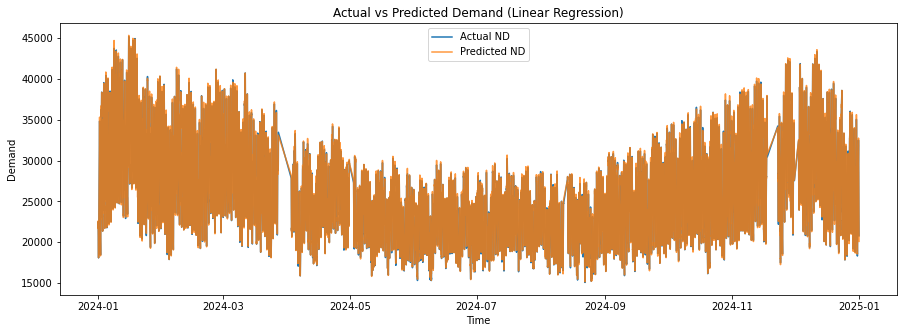

In [126]:
#Actual vs Predicted Plot

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

plt.plot(test["timestamp"], y_test, label="Actual ND")
plt.plot(test["timestamp"], lr_preds, label="Predicted ND", alpha=0.8)

plt.title("Actual vs Predicted Demand (Linear Regression)")
plt.xlabel("Time")
plt.ylabel("Demand")
plt.legend()
plt.show()


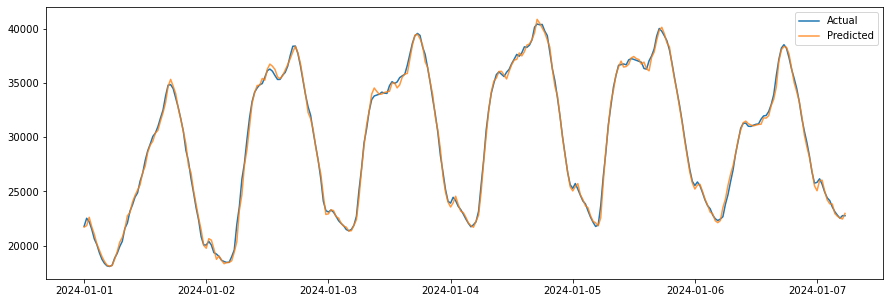

In [127]:
#zoomed 1wk plot
plt.figure(figsize=(15,5))
plt.plot(test["timestamp"].iloc[:300], y_test.iloc[:300], label="Actual")
plt.plot(test["timestamp"].iloc[:300], lr_preds[:300], label="Predicted", alpha=0.8)
plt.legend()
plt.show()

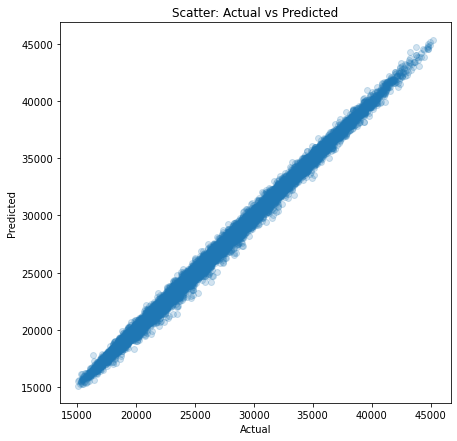

In [128]:
#scatter plot showing total-year accuracy
#no cloud spreading out (which would show bias)
plt.figure(figsize=(7,7))
plt.scatter(y_test, lr_preds, alpha=0.2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Scatter: Actual vs Predicted")
plt.show()

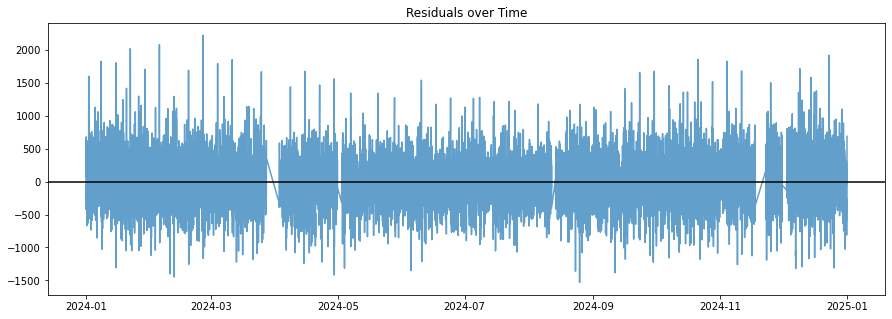

In [130]:
#residual plot showing model weaknesses
#bias, seasonality, holiday features, temperature mis-modelling
#some jumps during seasonal traditions eg temp lag isnt perfect, holidays cause spikes, seasonal effects partially linear
residuals = y_test - lr_preds
plt.figure(figsize=(15,5))
plt.plot(test["timestamp"], residuals, alpha=0.7)
plt.axhline(0, color="black")
plt.title("Residuals over Time")
plt.show()

In [ ]:
#Results Summary -

#captures daily shape
#predicts overall demand accurately
#has low MAE and RMSE
#generalises well on unseen data
#shows no major bias
#errors are centered around zero (good)

In [131]:
#RIDGE REGRESSION NEXT, - shrink unstable coef & improves generalisation, reduce overfitting from lags, reduce RMSE
from sklearn.linear_model import Ridge

# Create Ridge model with a regularisation strength
ridge_model = Ridge(alpha=10) #alpha 10 controls regulation strength, higher = more shrinkgae, lower = closer to plain LR

# Fit model
ridge_model.fit(X_train, y_train)

# Predict
ridge_preds = ridge_model.predict(X_test)

# Evaluate
ridge_mae = mean_absolute_error(y_test, ridge_preds)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_preds))

ridge_mae, ridge_rmse

(257.9816679719815, 344.786959806128)

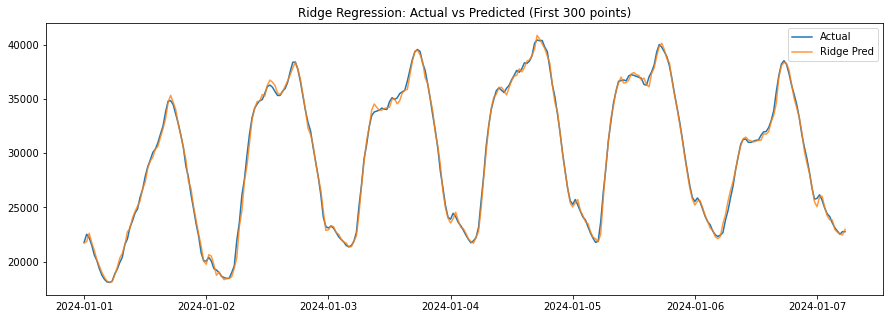

In [132]:
# Ridge Regression Visual Check
# Even though Ridge did not improve RMSE, we plot the first 300 points to confirm
# that Ridge predictions closely follow the actual demand, similar to Linear Regression.
plt.figure(figsize=(15,5))
plt.plot(test["timestamp"].iloc[:300], y_test.iloc[:300], label="Actual")
plt.plot(test["timestamp"].iloc[:300], ridge_preds[:300], 
         label="Ridge Pred", alpha=0.8)
plt.legend()
plt.title("Ridge Regression: Actual vs Predicted (First 300 points)")
plt.show()


In [133]:
#COMPARE COEFFICIENTS
# Compare Linear vs Ridge coefficients
# Ridge slightly shrinks coefficients toward zero,
# but here the effect is minimal because the dataset is large and stable.
# This confirms that a more advanced nonlinear model may be needed.

coef_df_ridge = pd.DataFrame({
    "feature": feature_cols,
    "ridge_coef": ridge_model.coef_,
    "linear_coef": lr_model.coef_
})

coef_df_ridge


,feature,ridge_coef,linear_coef
0,temperature_C,-0.381630,-0.381986
1,temp_lag_1,-0.413730,-0.414080
2,temp_lag_48,-0.420756,-0.421005
3,lag_1,1.381644,1.381629
4,lag_2,-0.406261,-0.406243
5,lag_3,-0.002000,-0.002014
6,lag_48,0.552710,0.552699
7,lag_49,-0.552610,-0.552602
8,lag_96,0.016520,0.016530
9,hour,-0.824066,-0.821894


In [ ]:
#I compared Linear Regression with Ridge as a regularisation check.
#The coefficients between the two models were almost identical, which indicates that the feature set is stable and multicollinearity is not a major issue.
#Because Ridge offered no performance improvement, this suggested the next improvements would likely come from a nonlinear model, so I progressed to Random Forest

In [147]:
#Random forest is a non linear model that capctures non linear effects, builds hundreds of random decision trees to split data, and average predictions
from sklearn.ensemble import RandomForestRegressor

In [148]:
rf_model = RandomForestRegressor(
    n_estimators=200,      # number of trees
    max_depth=20,         # limit tree depth to avoid overfitting
    random_state=42,      # reproducibility
    n_jobs=-1             # use all CPU cores for faster training
)

In [149]:
#fit model
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=200, n_jobs=-1,
                      random_state=42)

In [150]:
rf_preds = rf_model.predict(X_test) #make predictions

In [152]:
#evaluate accuracy
rf_mae = mean_absolute_error(y_test, rf_preds)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))

rf_mae, rf_rmse

(254.89209316908995, 339.3676655809943)

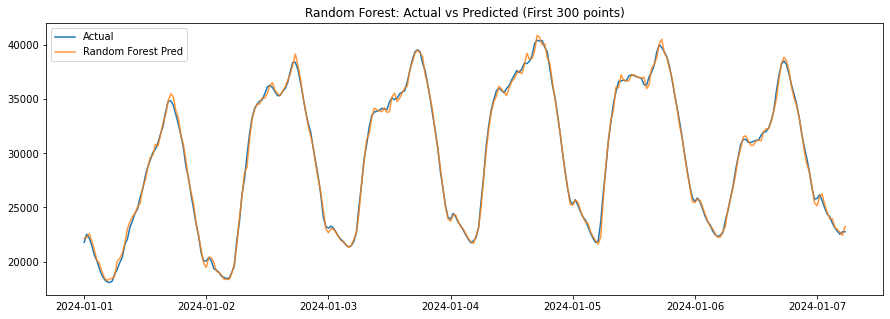

In [153]:
#Plot Actual vs Predicted for Random Forest
plt.figure(figsize=(15,5))
plt.plot(test["timestamp"].iloc[:300], y_test.iloc[:300], label="Actual")
plt.plot(test["timestamp"].iloc[:300], rf_preds[:300], 
         label="Random Forest Pred", alpha=0.8)
plt.legend()
plt.title("Random Forest: Actual vs Predicted (First 300 points)")
plt.show()


In [154]:
#Feature importance
importances = rf_model.feature_importances_

rf_imp_df = pd.DataFrame({
    "feature": feature_cols,
    "importance": importances
}).sort_values(by="importance", ascending=False)

rf_imp_df


,feature,importance
3,lag_1,0.980854
9,hour,0.007975
5,lag_3,0.007333
4,lag_2,0.001347
0,temperature_C,0.000420
2,temp_lag_48,0.000351
6,lag_48,0.000318
8,lag_96,0.000313
10,day_of_week,0.000244
11,month,0.000231


In [ ]:
#lag_1 completely dominates (98% importance)

#Random Forest has basically learned:

#The best predictor of demand right now… is demand 30 minutes ago.